In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('../writes/shortpropdata.csv')
print(df)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3280)

       IsWR  IsKR  IsCN  IsEUW  IsNA  IsPCS  IsVN  IsJP  IsBR  IsLAT  ...  \
0         0     0     0      0     0      0     0     0     1      0  ...   
1         0     1     0      0     0      0     0     0     0      0  ...   
2         0     0     0      0     0      0     0     0     0      0  ...   
3         0     0     0      0     0      0     0     0     0      0  ...   
4         1     0     0      0     0      0     0     0     0      0  ...   
...     ...   ...   ...    ...   ...    ...   ...   ...   ...    ...  ...   
35203     0     0     0      0     0      0     0     0     0      0  ...   
35204     0     0     0      0     0      0     0     0     0      0  ...   
35205     0     0     0      0     0      0     0     0     0      0  ...   
35206     0     0     0      0     0      0     0     0     0      0  ...   
35207     0     0     0      0     0      0     0     0     0      0  ...   

       Meta_Adjusted_T2_P5_Win Rate  Meta_Adjusted_T2_P5_KDA  \
0          

In [13]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=100000, random_state=4200, verbose=1)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          270     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.18488D+01


 This problem is unconstrained.



At iterate   50    f=  5.81277D-01    |proj g|=  2.05950D+00

At iterate  100    f=  5.75522D-01    |proj g|=  1.65002D+00

At iterate  150    f=  5.71751D-01    |proj g|=  2.40832D+00

At iterate  200    f=  5.71109D-01    |proj g|=  6.07914D-01

At iterate  250    f=  5.70664D-01    |proj g|=  2.27837D-01

At iterate  300    f=  5.70246D-01    |proj g|=  8.75529D-01

At iterate  350    f=  5.69796D-01    |proj g|=  7.36583D-01

At iterate  400    f=  5.69389D-01    |proj g|=  1.48706D-01

At iterate  450    f=  5.69070D-01    |proj g|=  4.44040D-01

At iterate  500    f=  5.68630D-01    |proj g|=  4.65978D-01

At iterate  550    f=  5.68340D-01    |proj g|=  4.81142D-01

At iterate  600    f=  5.68067D-01    |proj g|=  3.98448D-01

At iterate  650    f=  5.67845D-01    |proj g|=  2.72860D-01

At iterate  700    f=  5.67321D-01    |proj g|=  6.23580D-01

At iterate  750    f=  5.66720D-01    |proj g|=  1.02010D+00

At iterate  800    f=  5.66393D-01    |proj g|=  1.79584D+00

At iter

/Users/johnliu/Documents/vscode-workspace/lol-rivalry/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [14]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7067594433399602
Confusion Matrix:
[[2498 1041]
 [1024 2479]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3539
           1       0.70      0.71      0.71      3503

    accuracy                           0.71      7042
   macro avg       0.71      0.71      0.71      7042
weighted avg       0.71      0.71      0.71      7042



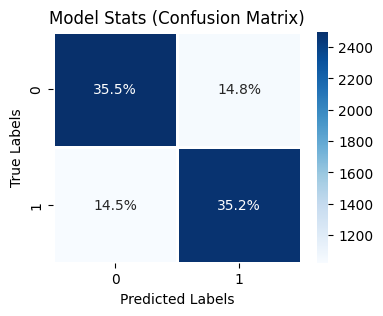

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=1., cmap='Blues', 
                 xticklabels=model.classes_, yticklabels=model.classes_)
total = 0
for t in ax.texts: total += float(t.get_text())
for t in ax.texts: t.set_text(f"{round(100 * float(t.get_text())/total, 1)}%")
plt.title(f'Model Stats (Confusion Matrix)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()